In [3]:
%pip install -Uqq fastbook nbdev
from fastbook import *

Note: you may need to restart the kernel to use updated packages.


In [4]:
urls = search_images_ddg('pug', max_images=100) # DuckDuckGo, can search any image
len(urls), urls[0]

(100, 'http://www.petpaw.com.au/wp-content/uploads/2014/06/Pug-4.jpg')

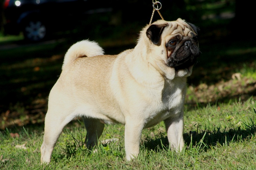

In [5]:
dest = Path('images/pug.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.thumbnail((256,256))
im

In [6]:
searches = 'pug','french bulldog'
path = Path('images/pug-or-not')

if not path.exists():
    for item in searches:
        dest = (path/item)
        dest.mkdir(parents=True, exist_ok=True)
        results = search_images_ddg(f'{item} dog')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

/home/abraham/personal/fastai/.venv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/abraham/personal/fastai/.venv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
# Remove broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);
len(failed)

14

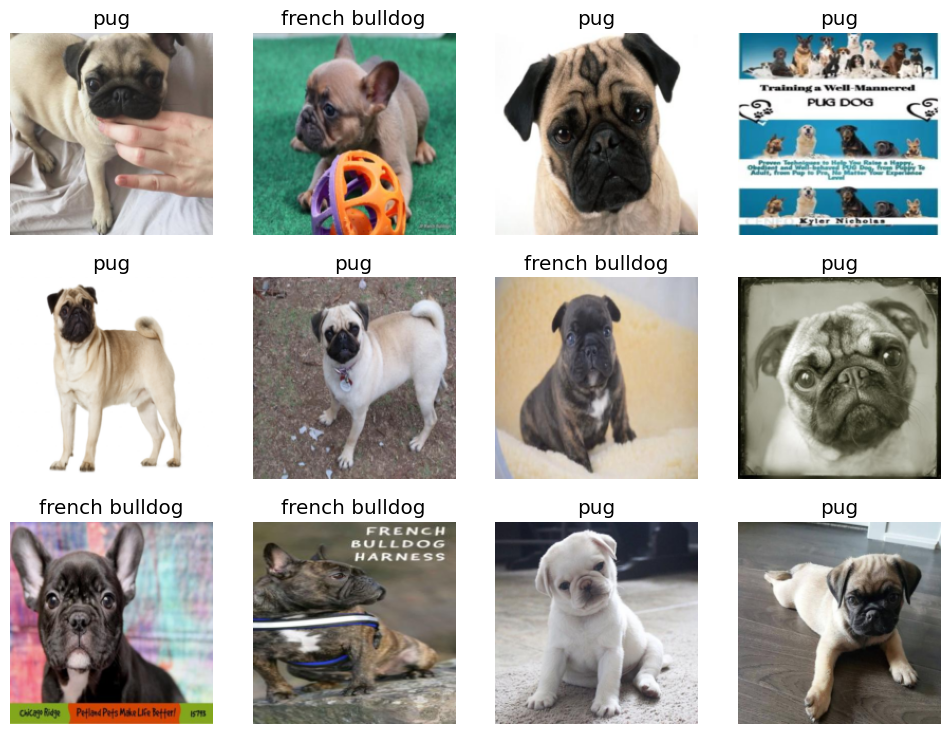

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # ImageBlock: input, CategoryBlock: output
    get_items=get_image_files, # get images from folder
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # split into train/valid sets (20% validation) and seed for reproducibility
    get_y=parent_label, # get label from parent folder
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12, nrows=3)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/abraham/personal/fastai/.venv/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/abraham/personal/fastai/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/abraham/personal/fastai/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
dog,_,probs = learn.predict(PILImage.create('images/pug.jpg'))
print(f"This is a: {dog}.")
print(f"Probability it's a pug: {probs[1].item():.6f}")

This is a: pug.
Probability it's a pug: 0.983603
